## 01-02-2026

# Module 3: Visualization & Batch Effects

**Purpose:**
Generate required assignment plots and assess batch effects.

---

## Required Plots (Assignment):
1. ✅ Fragment length distribution
2. ✅ Start/end position distributions
3. ✅ End motif distribution
4. ✅ Methylation analysis

---

## Batch Effects:
- Test Discovery vs Validation differences
- Check for confounding with disease status

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

# Import Module 3
from src.visualization import run_module_3

# Import config
from src.config import ALL_FEATURES, REQUIRED_PLOTS_DIR, BATCH_EFFECTS_FILE

## Generate All Plots

Run the complete Module 3 pipeline:
1. Load all features from Module 2
2. Generate 4 required plots
3. Assess batch effects (Discovery vs Validation)

In [7]:
# Run complete Module 3 pipeline
features_df = run_module_3()


MODULE 3: Visualization & Batch Effects

Loading features from: /Users/maggiebrown/Desktop/PrimaMente/wgbs_classifier/data/processed/all_features.csv
✓ Loaded: 22 samples × 1236 features

GENERATING REQUIRED PLOTS

1. Fragment Length Distribution
----------------------------------------------------------------------
  ✓ Saved: 01_fragment_length_distribution.png

2. Start/End Position Distributions
----------------------------------------------------------------------
  Using 468 coverage bins
  Coverage range: 0.000% - 0.641%
  ✓ Saved: 02_position_distributions.png

3. End Motif Distribution
----------------------------------------------------------------------
  ✓ Saved: 03_end_motif_distribution.png

4. Methylation Analysis
----------------------------------------------------------------------
  ✓ Saved: 04_methylation_analysis.png

BATCH EFFECT ASSESSMENT

Batch Effect Assessment

1. Batch-Disease Confounding:
----------------------------------------------------------------------

## View Required Plots

Required Assignment Plots:

1. 01 Fragment Length Distribution
----------------------------------------------------------------------


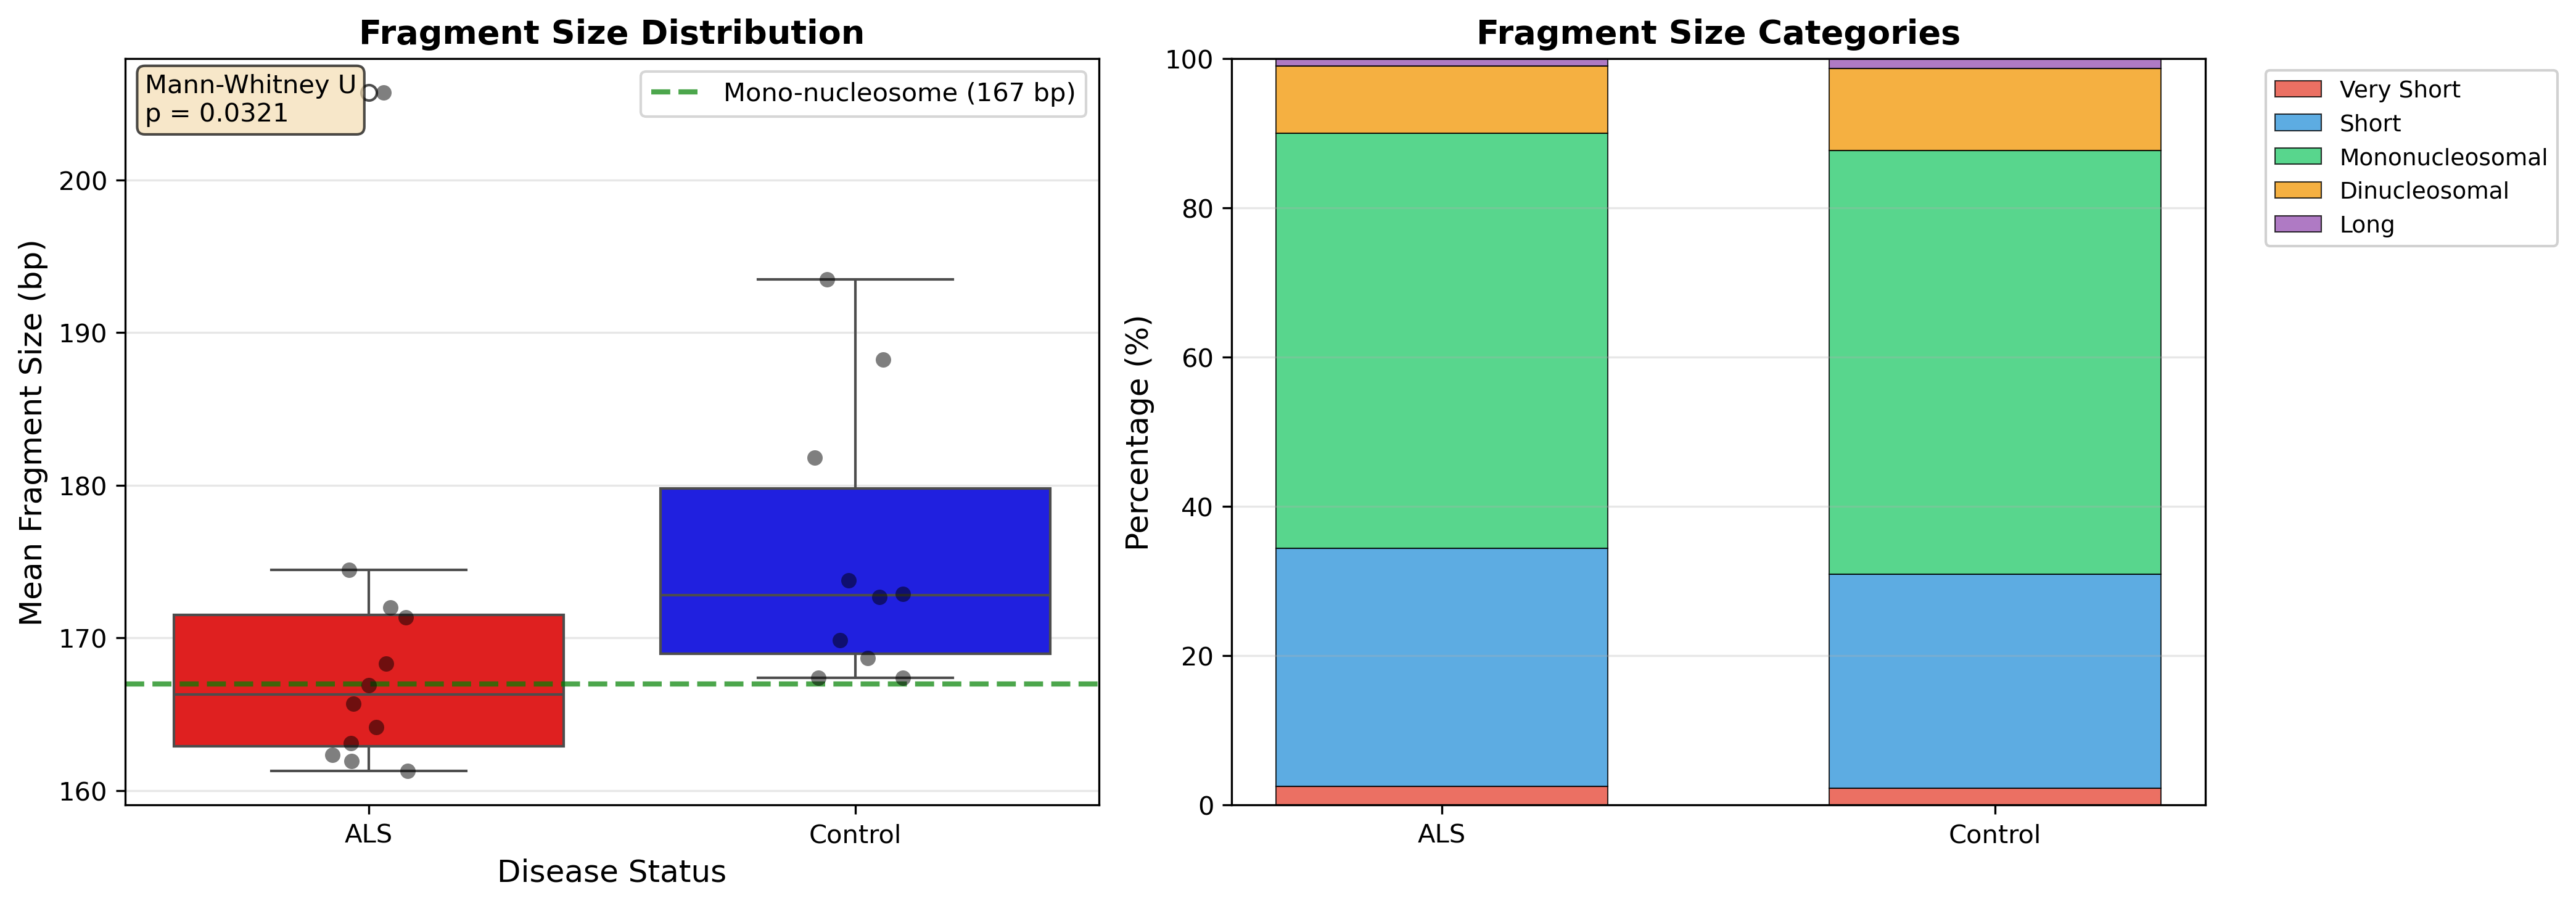


2. 02 Position Distributions
----------------------------------------------------------------------


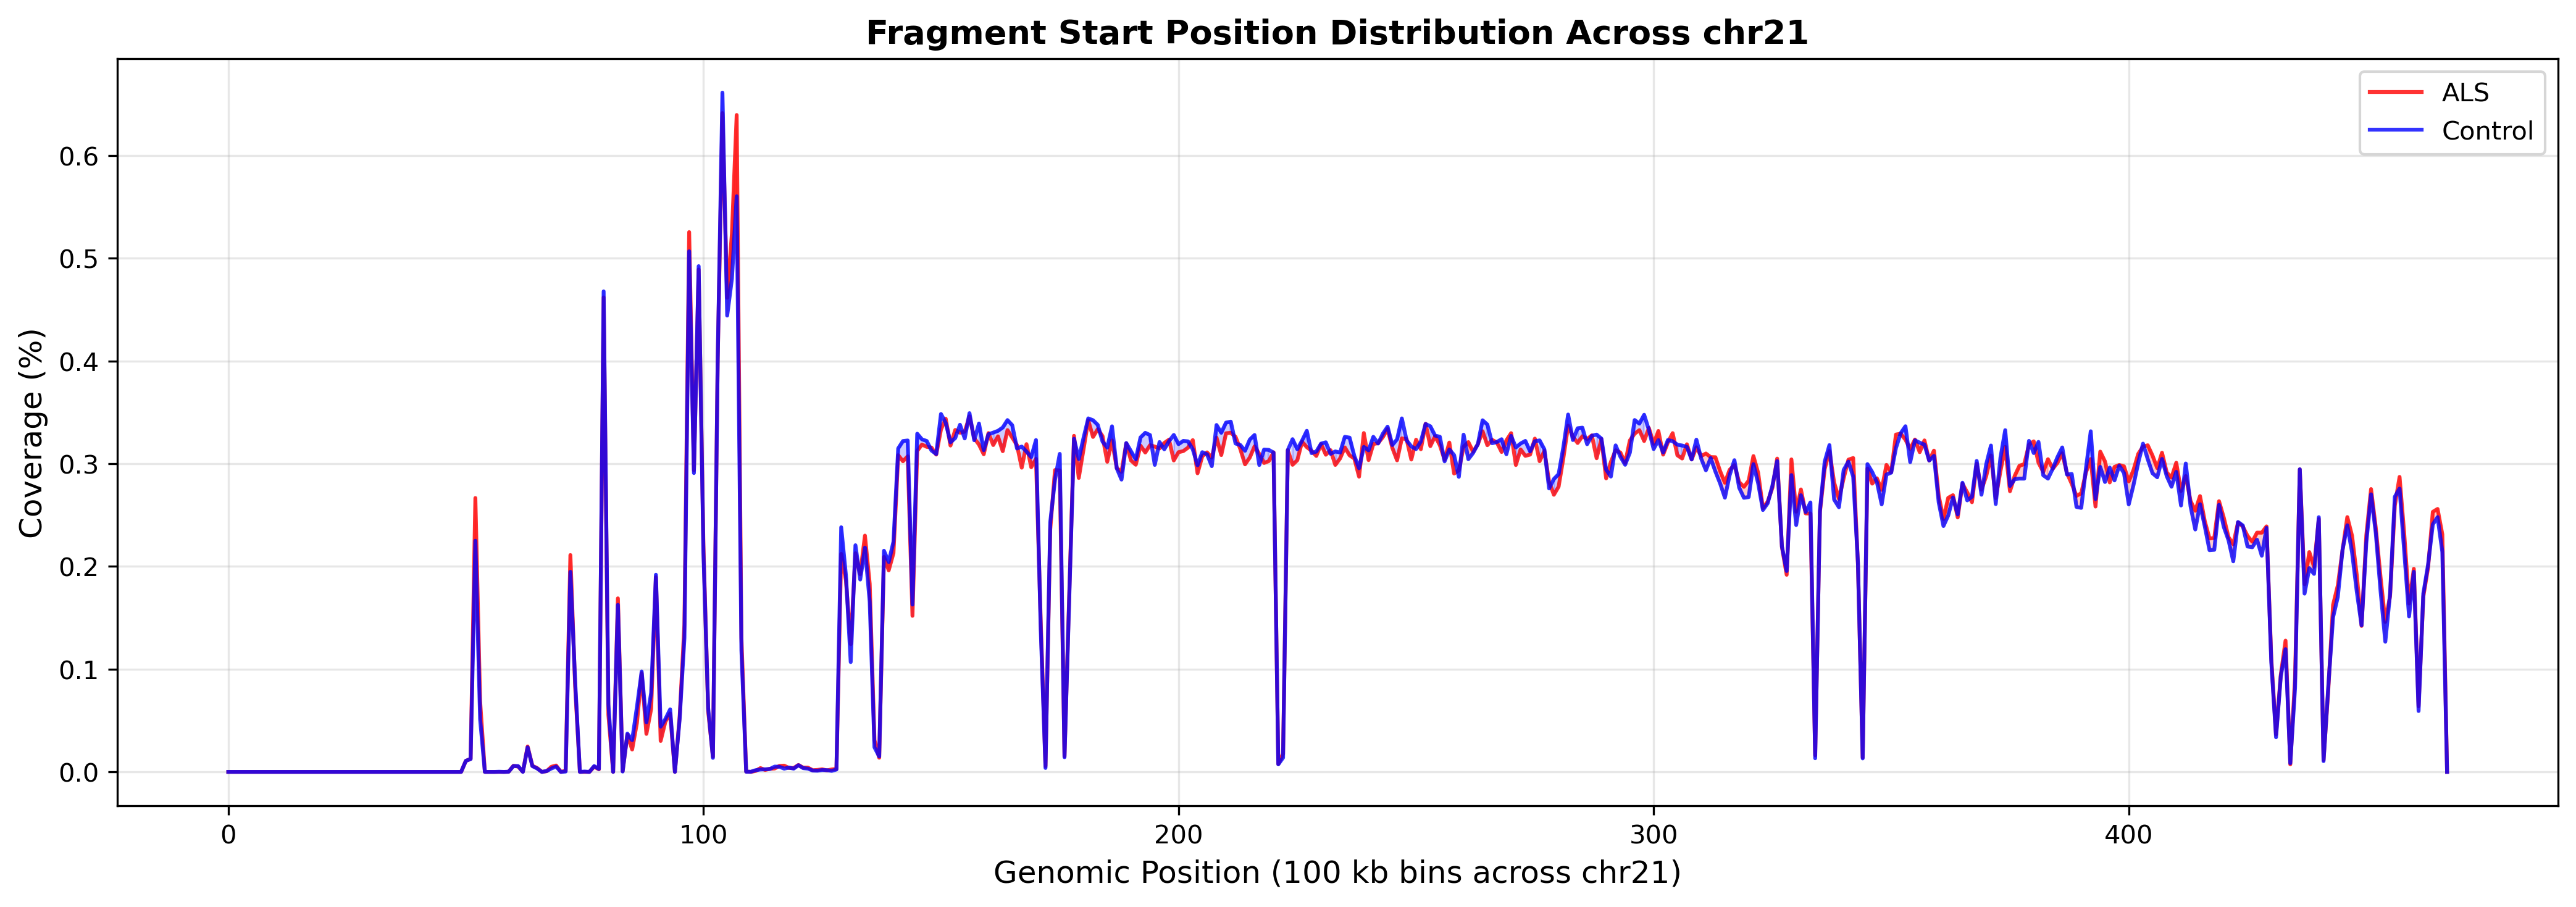


3. 03 End Motif Distribution
----------------------------------------------------------------------


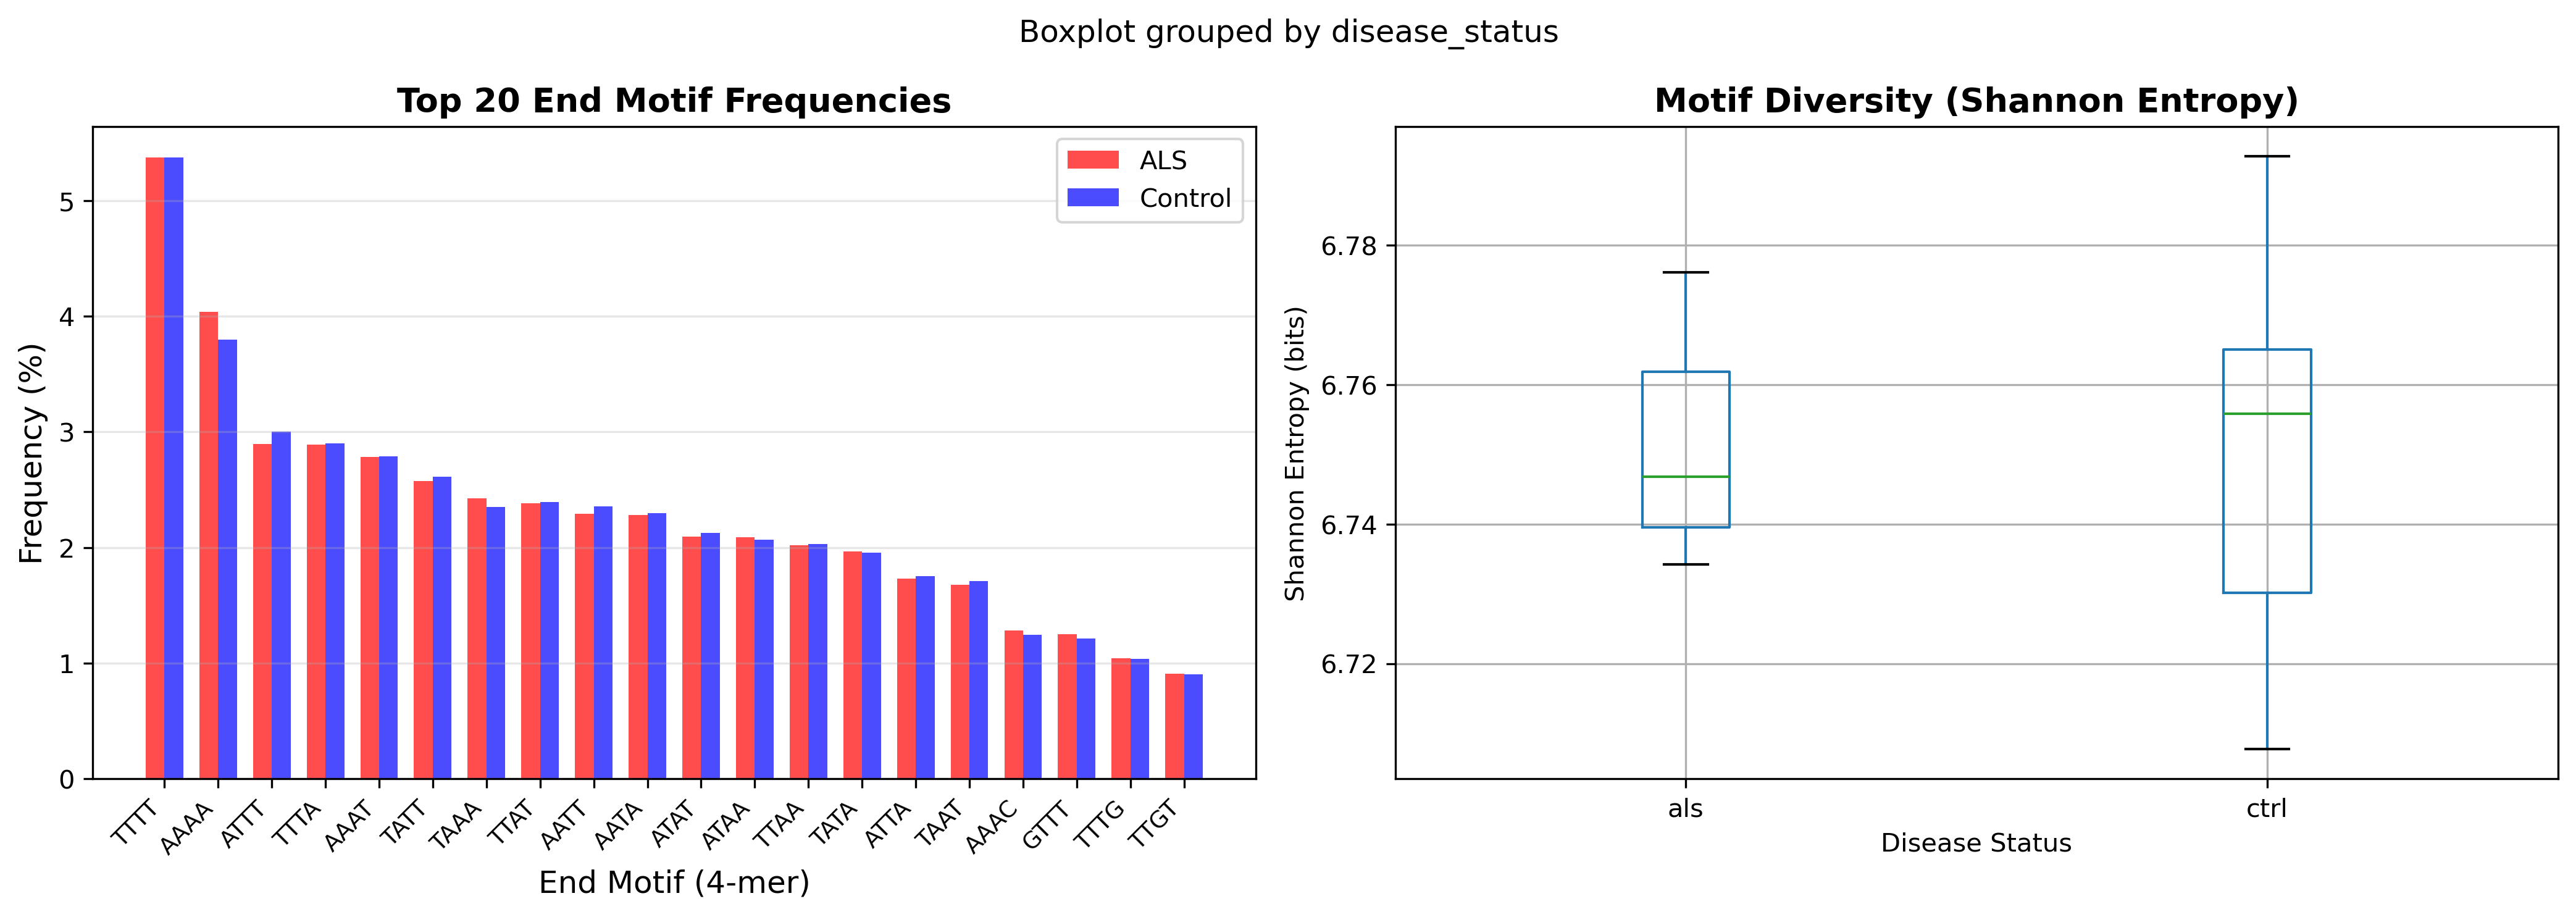


4. 04 Methylation Analysis
----------------------------------------------------------------------


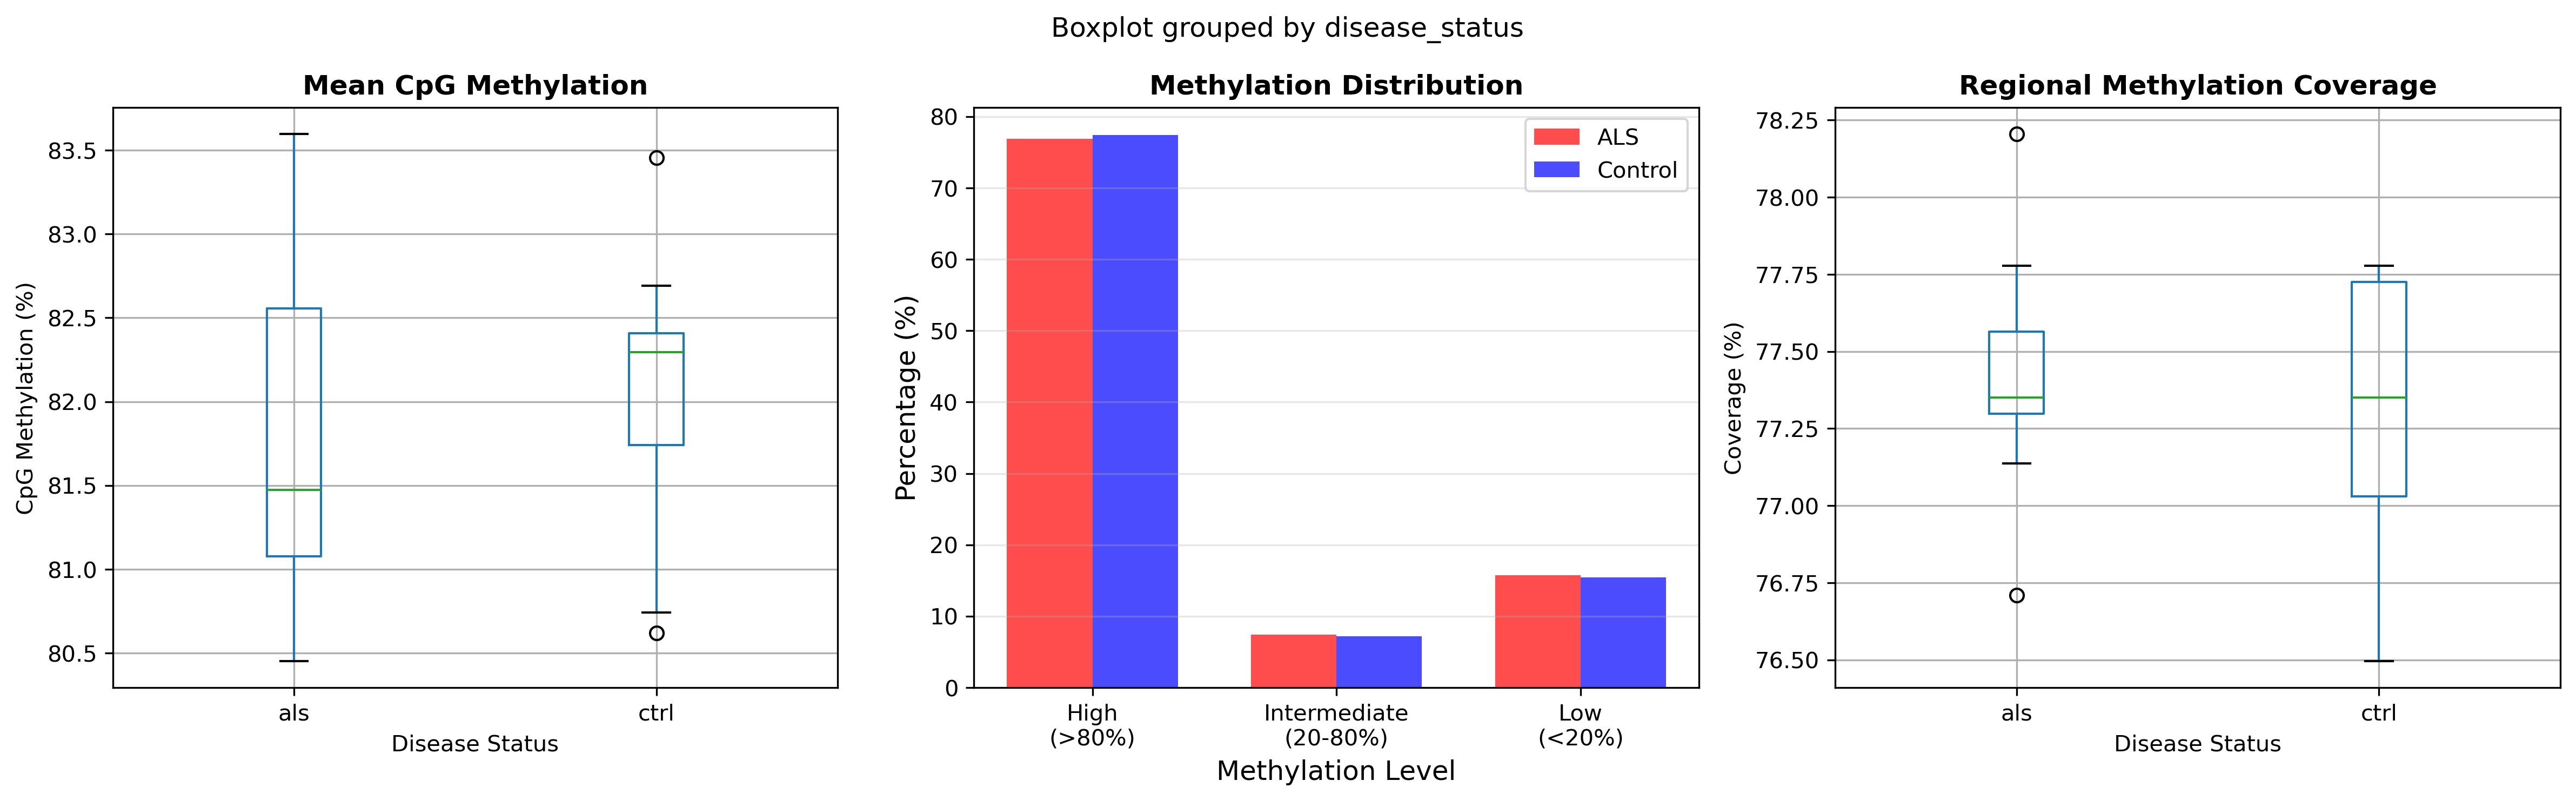

In [8]:
print("Required Assignment Plots:")
print("=" * 70)

# Display all required plots
plot_files = sorted(REQUIRED_PLOTS_DIR.glob('*.png'))

for i, plot_file in enumerate(plot_files, 1):
    print(f"\n{i}. {plot_file.stem.replace('_', ' ').title()}")
    print("-" * 70)
    display(Image(filename=str(plot_file)))

## Examine Batch Effects

Check if Discovery and Validation sets differ systematically.

In [9]:
print("Batch Effect Analysis:")
print("=" * 70)

if BATCH_EFFECTS_FILE.exists():
    batch_effects_df = pd.read_csv(BATCH_EFFECTS_FILE)
    
    print("\nFeature differences between Discovery and Validation:")
    print(batch_effects_df.to_string(index=False))
    
    # Summary
    n_sig = batch_effects_df['significant'].eq('Yes').sum()
    print(f"\n\nSummary:")
    print(f"  Total features tested: {len(batch_effects_df)}")
    print(f"  Significant batch effects (p < 0.05): {n_sig}")
    
    if n_sig == 0:
        print("\n✓ No significant batch effects detected")
        print("  Discovery and Validation sets are comparable")
    else:
        print(f"\n⚠️  {n_sig} feature(s) differ between batches")
        print("  Consider batch correction in Module 5")
        print("\nSignificant features:")
        sig_features = batch_effects_df[batch_effects_df['significant'] == 'Yes']
        for _, row in sig_features.iterrows():
            print(f"  - {row['feature']}: p = {row['p_value']:.4f}")
else:
    print("⚠️  Batch effects file not found")

Batch Effect Analysis:

Feature differences between Discovery and Validation:
           feature  discovery_mean  discovery_std  validation_mean  validation_std  p_value significant
         frag_mean      179.697353      13.585296       168.278454        6.767357 0.006367         Yes
     frag_pct_long        1.672874       1.724012         0.832256        0.545152 0.059374          No
     meth_mean_cpg        0.823719       0.007295         0.816483        0.009526 0.081696          No
regional_meth_mean        0.818115       0.006701         0.808747        0.010987 0.050161          No
   motif_diversity        6.748843       0.019195         6.751814        0.021226 0.815405          No


Summary:
  Total features tested: 5
  Significant batch effects (p < 0.05): 1

⚠️  1 feature(s) differ between batches
  Consider batch correction in Module 5

Significant features:
  - frag_mean: p = 0.0064


## K-mer Analysis (All 256 K-mers)

Check on the k-mer features in the motif plot.

K-mer Feature Analysis:

Total k-mers in feature matrix: 256

Top 20 most frequent k-mers (shown in Required Plot #3):
 1. TTTT  : 5.372% (ALS=5.371%, Ctrl=5.372%, diff=-0.001%, p=0.448 )
 2. AAAA  : 3.927% (ALS=4.036%, Ctrl=3.796%, diff=+0.240%, p=0.081 )
 3. ATTT  : 2.943% (ALS=2.896%, Ctrl=2.999%, diff=-0.104%, p=0.070 )
 4. TTTA  : 2.893% (ALS=2.887%, Ctrl=2.899%, diff=-0.012%, p=0.869 )
 5. AAAT  : 2.786% (ALS=2.785%, Ctrl=2.786%, diff=-0.001%, p=0.869 )
 6. TATT  : 2.589% (ALS=2.573%, Ctrl=2.610%, diff=-0.037%, p=0.531 )
 7. TAAA  : 2.390% (ALS=2.424%, Ctrl=2.349%, diff=+0.075%, p=0.668 )
 8. TTAT  : 2.386% (ALS=2.380%, Ctrl=2.392%, diff=-0.012%, p=0.621 )
 9. AATT  : 2.320% (ALS=2.293%, Ctrl=2.353%, diff=-0.060%, p=0.575 )
10. AATA  : 2.286% (ALS=2.278%, Ctrl=2.296%, diff=-0.017%, p=0.668 )
11. ATAT  : 2.108% (ALS=2.093%, Ctrl=2.126%, diff=-0.033%, p=0.921 )
12. ATAA  : 2.080% (ALS=2.089%, Ctrl=2.068%, diff=+0.021%, p=0.767 )
13. TTAA  : 2.025% (ALS=2.021%, Ctrl=2.030%, diff=-0.

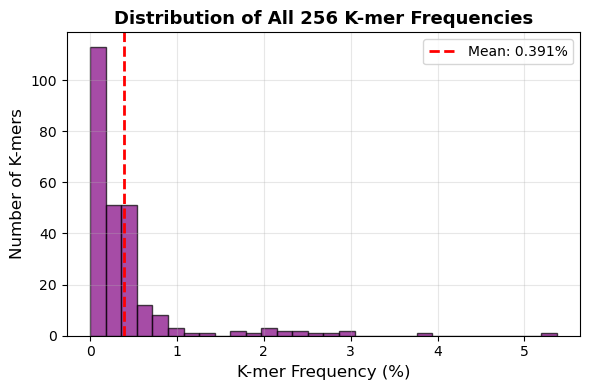

In [12]:
print("K-mer Feature Analysis:")
print("=" * 70)

# Get all k-mer columns
kmer_cols = [c for c in features_df.columns if c.startswith('kmer_')]

print(f"\nTotal k-mers in feature matrix: {len(kmer_cols)}")

# Calculate mean frequency across all samples
kmer_means = features_df[kmer_cols].mean().sort_values(ascending=False)

print(f"\nTop 20 most frequent k-mers (shown in Required Plot #3):")
print("=" * 70)

top_20 = kmer_means.head(20)
for i, (kmer, freq) in enumerate(top_20.items(), 1):
    kmer_seq = kmer.replace('kmer_', '')
    
    # Get ALS vs Control means for this k-mer
    als_mean = features_df[features_df['disease_status'] == 'als'][kmer].mean()
    ctrl_mean = features_df[features_df['disease_status'] == 'ctrl'][kmer].mean()
    diff = als_mean - ctrl_mean
    
    # Statistical test
    from scipy.stats import mannwhitneyu
    als_vals = features_df[features_df['disease_status'] == 'als'][kmer]
    ctrl_vals = features_df[features_df['disease_status'] == 'ctrl'][kmer]
    stat, p_val = mannwhitneyu(als_vals, ctrl_vals)
    
    sig = '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*' if p_val < 0.05 else ''
    
    print(f"{i:2d}. {kmer_seq:6s}: {freq:.3f}% (ALS={als_mean:.3f}%, Ctrl={ctrl_mean:.3f}%, diff={diff:+.3f}%, p={p_val:.3f} {sig})")

print(f"\n\nK-mer distribution statistics:")
print(f"  Mean frequency: {kmer_means.mean():.4f}%")
print(f"  Std: {kmer_means.std():.4f}%")
print(f"  Min: {kmer_means.min():.4f}%")
print(f"  Max: {kmer_means.max():.4f}%")

# Visualization
fig, ax = plt.subplots(figsize=(6, 4))

ax.hist(kmer_means.values, bins=30, edgecolor='black', alpha=0.7, color='purple')
ax.axvline(kmer_means.mean(), color='red', linestyle='--', linewidth=2, 
          label=f'Mean: {kmer_means.mean():.3f}%')
ax.set_xlabel('K-mer Frequency (%)', fontsize=12)
ax.set_ylabel('Number of K-mers', fontsize=12)
ax.set_title('Distribution of All 256 K-mer Frequencies', fontsize=13, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Summary

**Module 3 Complete!** ✓

---

### Required Plots Generated:
1. ✅ Fragment length distribution
2. ✅ Start/end position distributions  
3. ✅ End motif distribution (updated for 256 k-mers)
4. ✅ Methylation analysis

---

### Batch Effects Detected

**Finding:** Mean fragment size differs between discovery and validation sets
- Discovery: 179.7 bp ± 13.6 bp
- Validation: 168.3 bp ± 6.8 bp  
- p = 0.0064

**Interpretation:**
- Likely technical artifact from different sequencing runs
- Disease signal (long fragments, p=0.013) exists independently
- No confounding between batch and disease status (χ² p > 0.05)

**Impact on Classification:**
- Models trained on discovery may not fully generalize to validation
- Expected: Discovery accuracy > Validation accuracy
- This is a known limitation given small sample size

**Mitigation:**
- Using cross-validation within discovery set to assess overfitting
- Reporting both discovery and validation performance separately
---

### Output Files:
- `results/figures/required_plots/` (4 PNG files)
- `results/tables/batch_effects_summary.csv`